<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Carga-de-datos-y-data-cleaning" data-toc-modified-id="Carga-de-datos-y-data-cleaning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carga de datos y <em>data cleaning</em></a></span></li><li><span><a href="#Anatomía-de-una-gráfica" data-toc-modified-id="Anatomía-de-una-gráfica-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Anatomía de una gráfica</a></span></li><li><span><a href="#Tipos-de-gráficos" data-toc-modified-id="Tipos-de-gráficos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Tipos de gráficos</a></span><ul class="toc-item"><li><span><a href="#Histograma" data-toc-modified-id="Histograma-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Histograma</a></span></li><li><span><a href="#Pie-Chart" data-toc-modified-id="Pie-Chart-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Pie Chart</a></span></li><li><span><a href="#Lineplot" data-toc-modified-id="Lineplot-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Lineplot</a></span></li><li><span><a href="#Scatterplot" data-toc-modified-id="Scatterplot-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Scatterplot</a></span></li><li><span><a href="#Heatmap" data-toc-modified-id="Heatmap-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Heatmap</a></span></li><li><span><a href="#Barplot" data-toc-modified-id="Barplot-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Barplot</a></span></li><li><span><a href="#joinplot" data-toc-modified-id="joinplot-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span><code>joinplot</code></a></span></li><li><span><a href="#Boxplot" data-toc-modified-id="Boxplot-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>Boxplot</a></span></li></ul></li></ul></div>

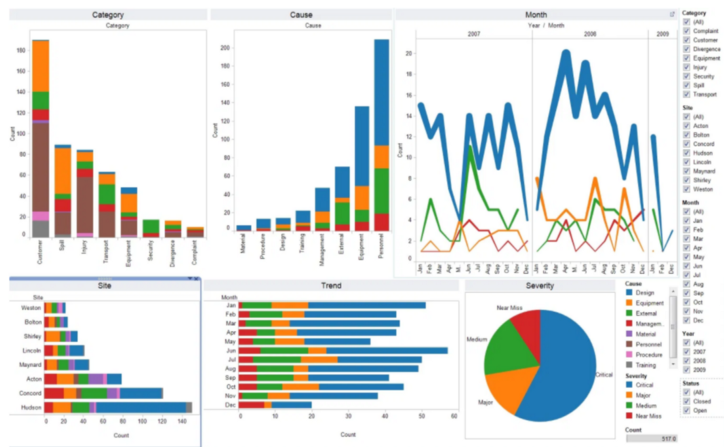

# Introducción

En la clase de hoy aprenderemos como hacer visualizaciones en Python. Para ello usaremos las principales librerías que tenemos: 

- matplotlib

- seaborn

- plotly express


El objetivo de hoy, hacer un EDA visual de nuestros datos para "entender" que es lo que está pasando. ¿Tenemos algún patrón en nuestros datos? 


Pero antes de ponernos manos a la obra... ¿Qué es EDA?

Si queremos explicar el EDA (acrónimo de *Exploratory Data Analysis*) en términos sencillos, significa que hay que tratar de entender mucho mejor los datos dados, para poder darles algún sentido.

> Dicho de otra forma, es un enfoque de análisis de conjuntos de datos para resumir sus características principales, a menudo con métodos visuales. 

EDA en Python utiliza la visualización de datos para extraer patrones y conocimientos significativos. También implica la preparación de conjuntos de datos para el análisis mediante la eliminación de irregularidades en los datos.

Basándose en los resultados de EDA, las empresas también toman decisiones de negocio, que pueden tener repercusiones posteriores.

❌ **Si el EDA no se realiza correctamente, puede obstaculizar los pasos posteriores en el proceso de creación de modelos de aprendizaje automático.**

✅ **Si se hace bien, puede mejorar la eficacia de todo lo que hagamos después.**

A lo largo de este jupyter realizaremos: 


- Limpieza de datos
- Análisis univariante
- Análisis bivariante
- Análisis multivariante




In [1]:
# primero importamos las librerías que vamos a necesitar

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime


In [2]:
#!pip install plotly-express

# Carga de datos y *data cleaning*


Dentro de la limpieza de datos podemos incluir: 

- Buscar valores faltantes y gestionarlos

- Columnas que no están en el formato correcto

- Nombres de las columnas


In [3]:
df = pd.read_csv("datos/retail_limpio.csv", index_col = 0)
df.head(2)

,customerid,invoiceno,invoicedate,stockcode,description,quantity,unitprice,revenue,country,nullid,desciption_cambiada,fecha,coordenadas,precio_total
0,12726,575880,2011-11-11 13:35:00.000000,21123,SET/10 IVORY POLKADOT PARTY CANDLES,28,1.25,30.00,France,198017.0,2,2011-11-11,"(46.603354, 1.8883335)",35.00
1,14083,536945,2010-12-03 12:24:00.000000,17107D,FLOWER FAIRY 5 DRAWER LINERS,7,2.55,7.65,United Kingdom,198017.0,2,2010-12-03,"(54.7023545, -3.2765753)",17.85


In [4]:
# chequeamos los tipos de datos que tenemos

df.dtypes

customerid               int64
invoiceno                int64
invoicedate             object
stockcode               object
description             object
quantity                 int64
unitprice              float64
revenue                float64
country                 object
nullid                 float64
desciption_cambiada      int64
fecha                   object
coordenadas             object
precio_total           float64
dtype: object

In [5]:
df['fecha'] = pd.to_datetime(df['fecha'])

In [6]:
df.dtypes

customerid                      int64
invoiceno                       int64
invoicedate                    object
stockcode                      object
description                    object
quantity                        int64
unitprice                     float64
revenue                       float64
country                        object
nullid                        float64
desciption_cambiada             int64
fecha                  datetime64[ns]
coordenadas                    object
precio_total                  float64
dtype: object

original

In [7]:
# antes de convertir a datetime

df["fecha"][0]

Timestamp('2011-11-11 00:00:00')

In [8]:
# cambiamos el formato de la columna fecha

df['fecha'] = df['fecha'].apply(pd.to_datetime)

In [9]:
# después de convertir a datetime

df["fecha"][0]

Timestamp('2011-11-11 00:00:00')

In [10]:
# volvemos a chequear los tipos de las columnas

df.dtypes

customerid                      int64
invoiceno                       int64
invoicedate                    object
stockcode                      object
description                    object
quantity                        int64
unitprice                     float64
revenue                       float64
country                        object
nullid                        float64
desciption_cambiada             int64
fecha                  datetime64[ns]
coordenadas                    object
precio_total                  float64
dtype: object

# Anatomía de una gráfica

Matplotlib es una librería de ploteo en 2-D que ayuda a visualizar figuras. 


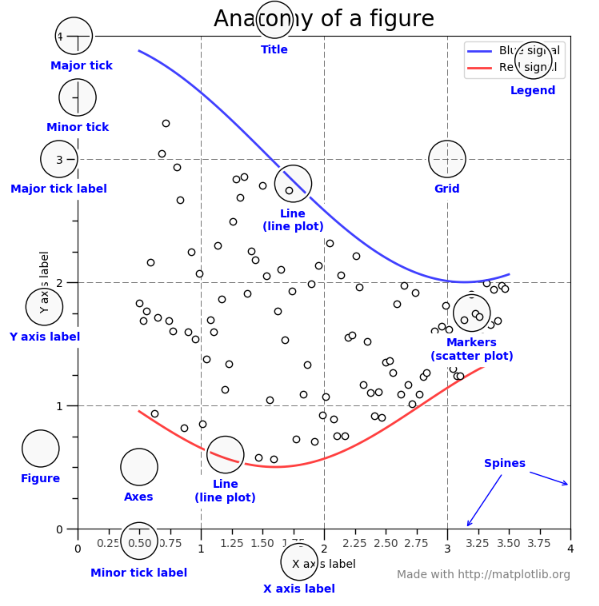




# Tipos de gráficos

## Histograma

Un histograma toma una serie de datos y los divide en una serie de intervalos ( o *bins*). A continuación, traza la frecuencia de los puntos de datos en cada intervalo (es decir, el intervalo de puntos). Es útil para entender el recuento de los rangos de datos.


**Cuándo utilizarlo**: Debemos utilizar el histograma cuando necesitemos el recuento de la variable en un gráfico.

1️⃣ **`MATPLOTLIB`** --> método `plt.hist`

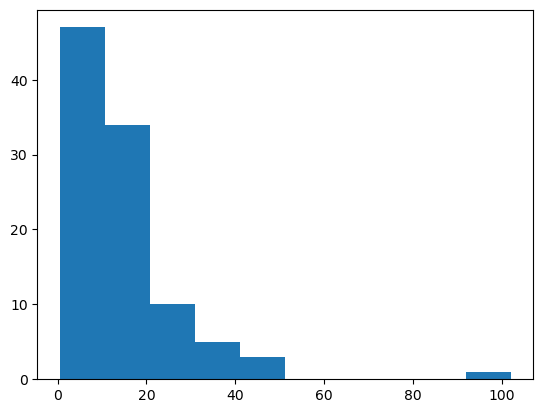

In [11]:
plt.hist(x = df['revenue']); # si no pones ; te pone los datos del chart

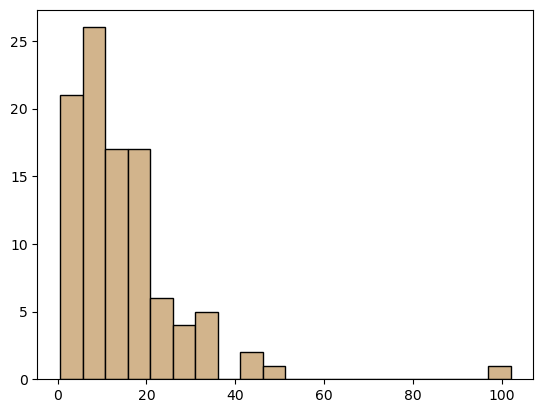

In [12]:
##voy a cambiar el color
plt.hist(x = df['revenue'],
    facecolor = 'tan',
    edgecolor = 'black',
    bins = 20
);

In [13]:
## voy a cambiar el tamaño de mi gráfica
## SOLO PARA MATPLOTLIB

plt.rcParams["figure.figsize"] = (15,5) ## establece el tamaño de mis gráficas

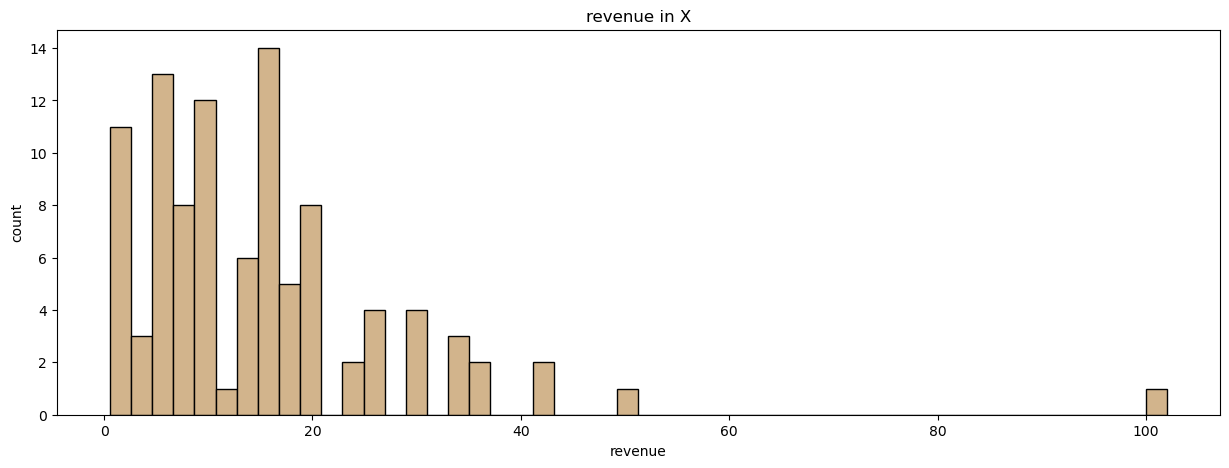

In [14]:
## todas las gráficas tienen que tener ejes
plt.hist(x = df['revenue'],
    facecolor = 'tan',
    edgecolor = 'black',
    bins = 50
)

plt.xlabel('revenue')
plt.ylabel('count')
plt.title('revenue in X');

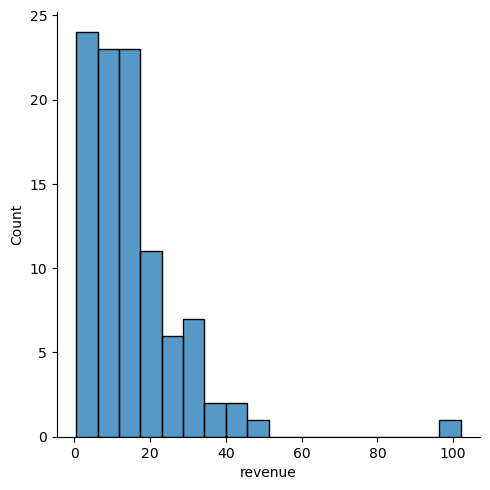

In [15]:
## ahora lo vemos en seaborn
sns.displot(x=df['revenue']);

In [16]:
##pd.cut() para hacer buckets!!!!!!

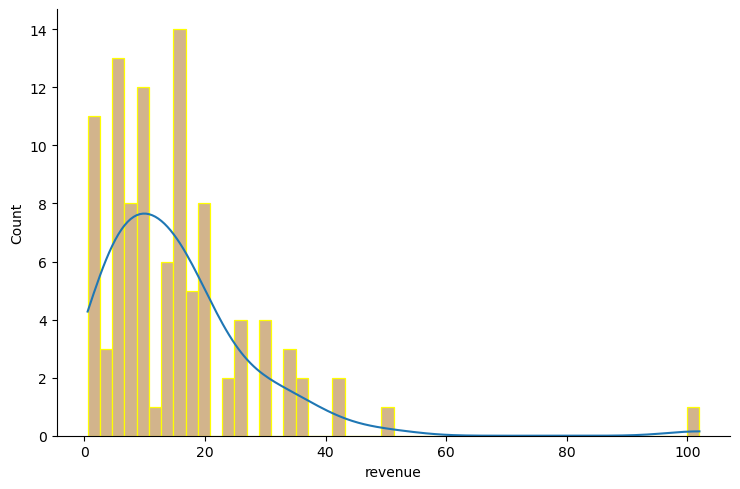

In [17]:
## se puede modificar igual que con matplotlib
sns.displot(x=df['revenue'],
    facecolor='tan',
    edgecolor='yellow',
    bins = 50,
    kde = True,
    height=5, ##la altura
    aspect=1.5 ##la relación entre la altura y el ancho
);

In [18]:
#!pip install ipykernel
#!pip install --upgrade nbformat


In [19]:
## ahora con plotly

fg1 = px.histogram(df,
    x = 'revenue',
    nbins = 20,
    width=900,
    height = 600
)

fg1.show()

In [20]:
fg1 = px.histogram(df,
    x = 'revenue',
    nbins = 20,
    width=900,
    height = 600
)

fg1.update_traces(marker = dict(color='grey'))

fg1.show()

quesitos -- suele ser difícil de comparar, mejor usarlo con pocas categorías

In [21]:
df.head() ## revenue / country

,customerid,invoiceno,invoicedate,stockcode,description,quantity,unitprice,revenue,country,nullid,desciption_cambiada,fecha,coordenadas,precio_total
0,12726,575880,2011-11-11 13:35:00.000000,21123,SET/10 IVORY POLKADOT PARTY CANDLES,28,1.25,30.00,France,198017.0,2,2011-11-11,"(46.603354, 1.8883335)",35.00
1,14083,536945,2010-12-03 12:24:00.000000,17107D,FLOWER FAIRY 5 DRAWER LINERS,7,2.55,7.65,United Kingdom,198017.0,2,2010-12-03,"(54.7023545, -3.2765753)",17.85
2,17870,581173,2011-12-07 15:07:00.000000,51014A,"FEATHER PEN,HOT PINK",16,0.39,4.68,United Kingdom,186653.0,2,2011-12-07,"(54.7023545, -3.2765753)",6.24
3,16347,574249,2011-11-03 13:01:00.000000,23203,JUMBO BAG DOILEY PATTERNS,14,2.08,20.80,United Kingdom,198017.0,2,2011-11-03,"(54.7023545, -3.2765753)",29.12
4,15570,543602,2011-02-10 13:34:00.000000,22976,CIRCUS PARADE CHILDRENS EGG CUP,6,1.25,2.50,United Kingdom,189829.0,2,2011-02-10,"(54.7023545, -3.2765753)",7.50


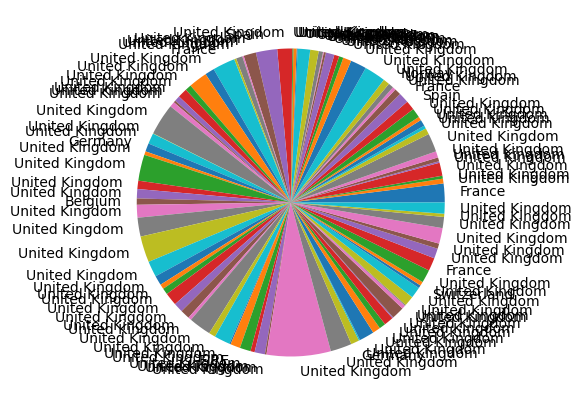

In [26]:
## con matplotlib
plt.pie(df['revenue'], labels = df['country']); ##hay que decirle como te tiene que agrupar los datos y tiene que ser una variable categórica

In [29]:
## agrupado
df_pie = df.groupby('country')['revenue'].mean().reset_index()
df_pie.head()

,country,revenue
0,Belgium,10.000
1,EIRE,15.700
2,France,25.775
3,Germany,13.200
4,Norway,8.400


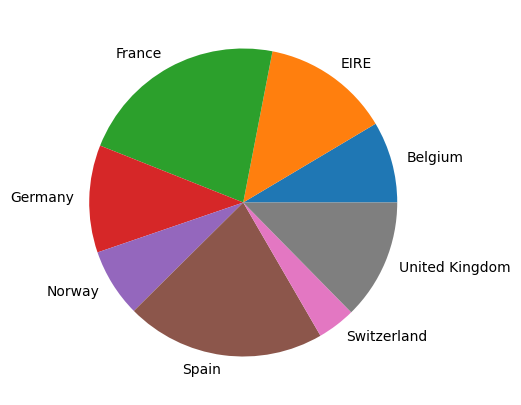

In [30]:
plt.pie(df_pie['revenue'], labels = df_pie['country']); ##amiga no se entiende

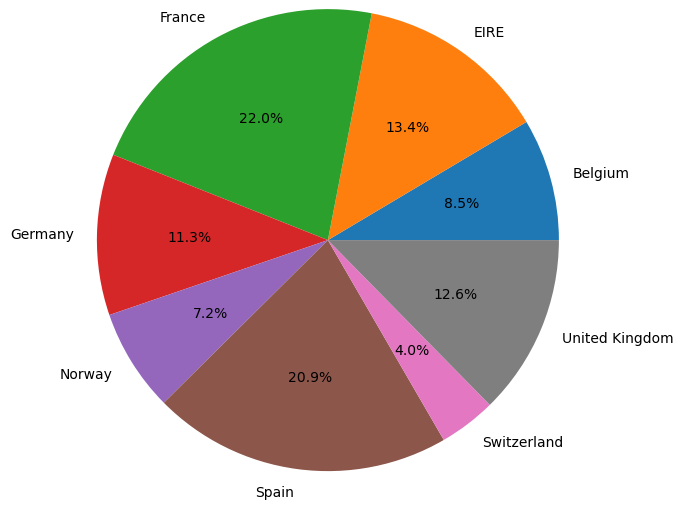

In [33]:
plt.pie(df_pie['revenue'], labels = df_pie['country'], autopct = '%1.1f%%', radius=1.5); ##puedes ver los valores en porcentaje: numeros enteros.número de decimales

In [35]:
df_pie.sort_values(by='revenue', inplace=True)

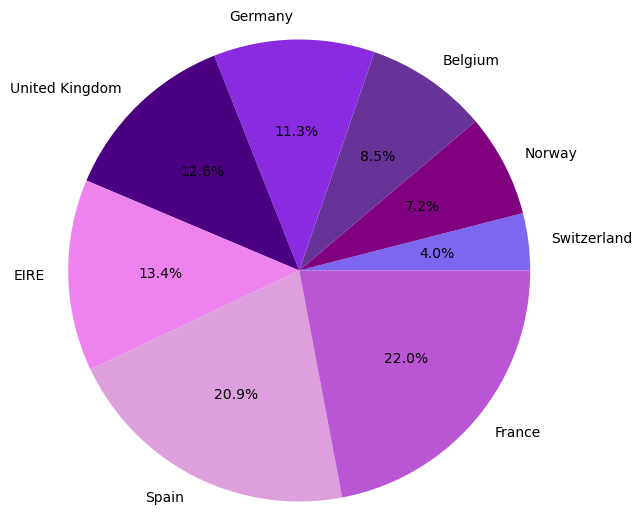

In [36]:
colors = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet'
          ,'indigo', 'violet', 'plum', 'mediumorchid'] # para establecer los colores


plt.pie(df_pie['revenue'], 
    labels = df_pie['country'], 
    autopct = '%1.1f%%', 
    radius=1.5,
    colors = colors
); ##puedes ver los valores en porcentaje: numeros enteros.número de decimales

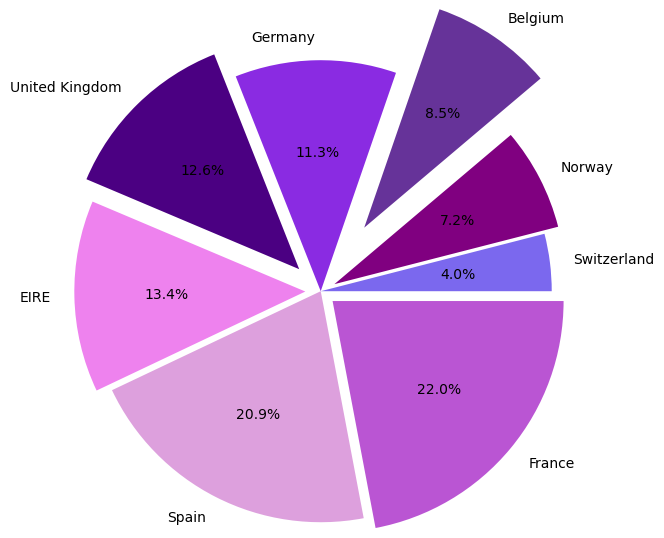

In [40]:
## separar quesitos
colors = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet'
          ,'indigo', 'violet', 'plum', 'mediumorchid'] # para establecer los colores

explode = (0, 0.1, 0.5, 0, 0.2, 0.1, 0, 0.1)

plt.pie(df_pie['revenue'], 
    labels = df_pie['country'], 
    autopct = '%1.1f%%', 
    radius=1.5,
    colors = colors,
    explode=explode
); ##puedes ver los valores en porcentaje: numeros enteros.número de decimales

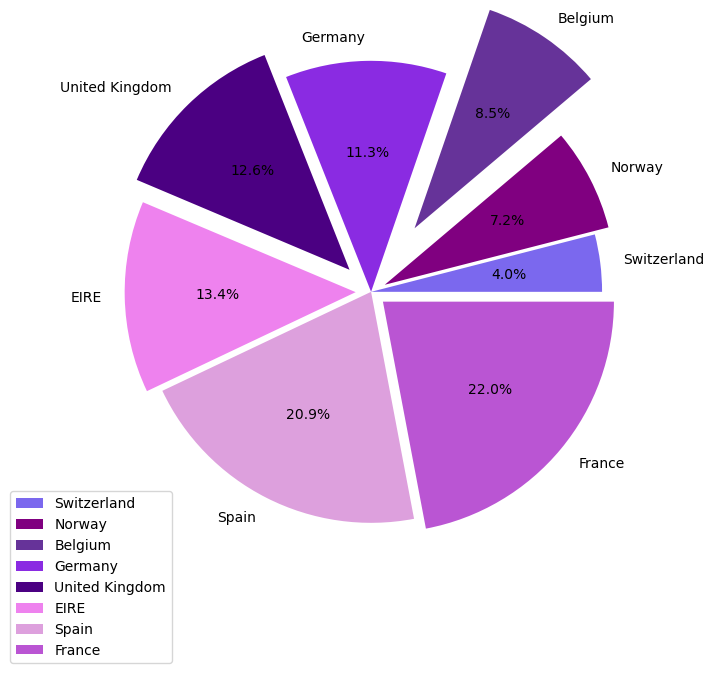

In [50]:
## separar quesitos
colors = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet'
          ,'indigo', 'violet', 'plum', 'mediumorchid'] # para establecer los colores

explode = (0, 0.1, 0.5, 0, 0.2, 0.1, 0, 0.1)

plt.pie(df_pie['revenue'], 
    labels = df_pie['country'], 
    autopct = '%1.1f%%', 
    radius=1.5,
    colors = colors,
    explode=explode
)

plt.legend(bbox_to_anchor = (0, 0));

#plt.title("Total compras país"); ##puedes ver los valores en porcentaje: numeros enteros.número de decimales

In [54]:
##lineplot

In [51]:
df['fecha'].dt.month.unique()

array([11, 12,  2,  9,  8,  4,  5, 10,  3,  1,  7,  6], dtype=int64)

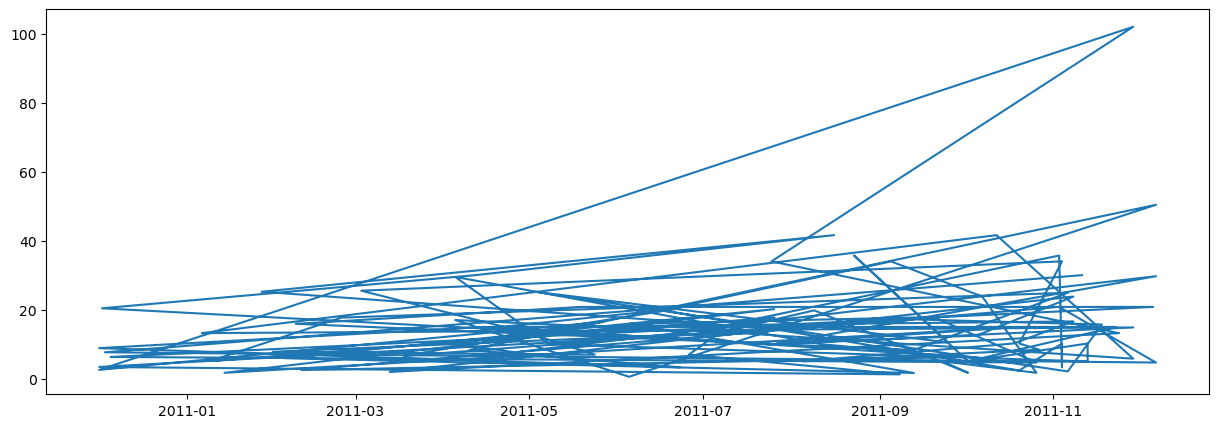

In [53]:
plt.plot(df['fecha'], df['revenue']) ## tienes meses repetidos, así que haces un groupby por mes y año

In [82]:
df_line = df.groupby(by=df['fecha'].dt.month)['revenue','quantity'].mean().reset_index()
df_line

C:\Users\annas\AppData\Local\Temp\ipykernel_20272\754397724.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,fecha,revenue,quantity
0,1,10.600000,11.200000
1,2,10.512500,6.750000
2,3,11.350000,7.666667
3,4,16.394444,14.555556
4,5,15.374286,15.428571
5,6,11.151667,13.500000
6,7,15.691818,15.545455
7,8,22.420000,16.400000
8,9,11.355556,11.000000
9,10,11.005385,12.538462


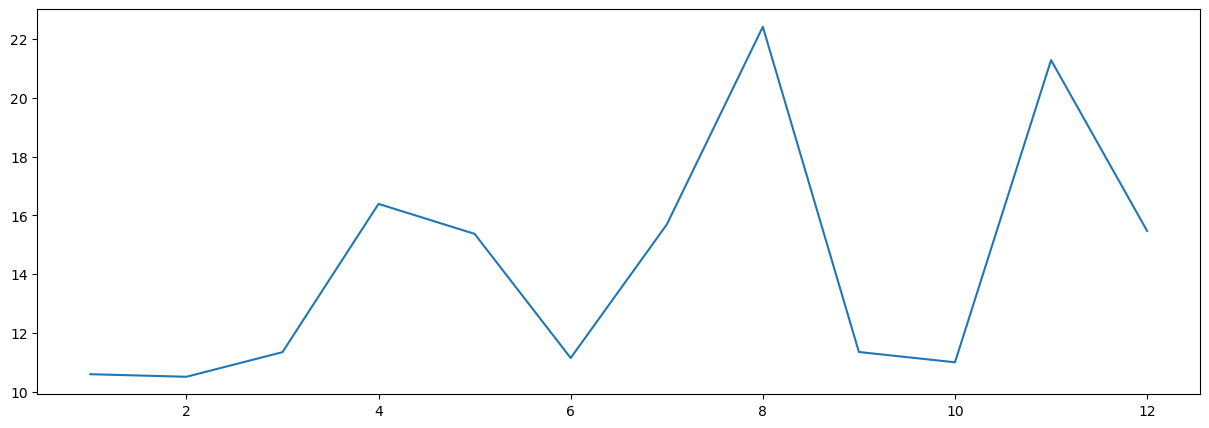

In [57]:
plt.plot(df_line['fecha'], 
    df_line['revenue']);

In [58]:
import calendar

In [60]:
meses = list(calendar.month_name)[1:]
meses

['January',
 'February',
 'March',
 'April',
 'May',
 'June',
 'July',
 'August',
 'September',
 'October',
 'November',
 'December']

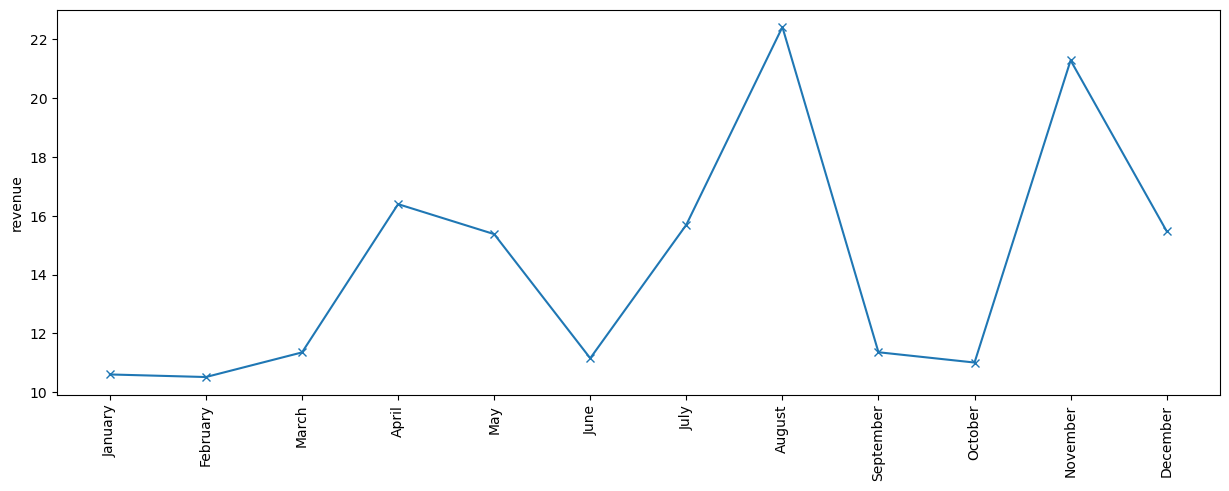

In [70]:
plt.plot(df_line['fecha'], 
    df_line['revenue'],
    linewidth=1.5,
    marker = "x" ##*para estrellita, o para circulos, + para mases
    )

plt.xticks(df_line['fecha'], meses, rotation = 90) ##lista de los valores nuevos, sobre que columna quiero pintar

plt.ylabel('revenue')

;

''

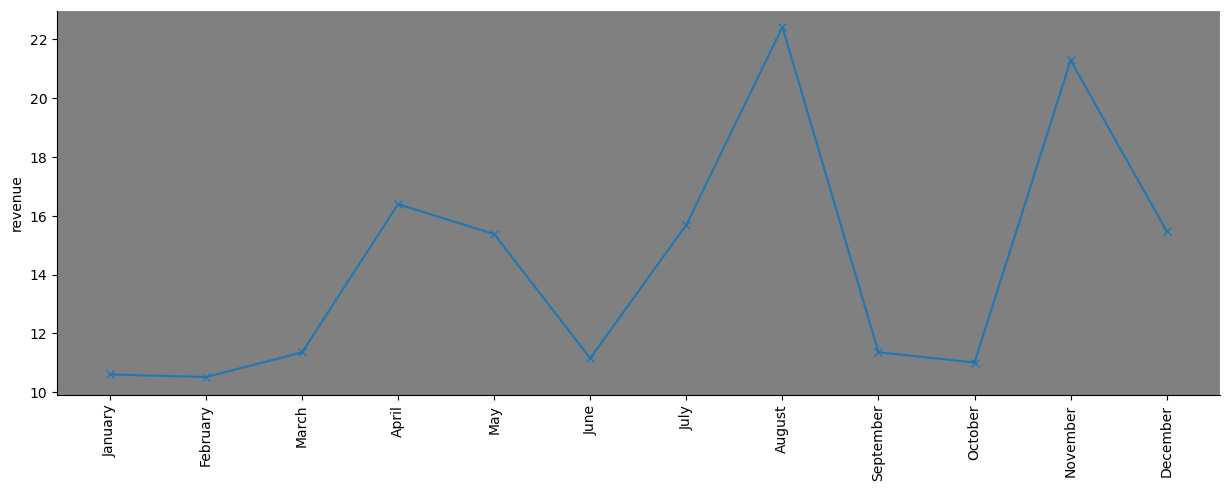

In [79]:
ax = plt.axes() ##creas una plantilla para modificar los ejes
ax.set_facecolor('gray')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('white')

plt.plot(df_line['fecha'], 
    df_line['revenue'],
    linewidth=1.5,
    marker = "x" ##*para estrellita, o para circulos, + para mases
    )

plt.xticks(df_line['fecha'], meses, rotation = 90) ##lista de los valores nuevos, sobre que columna quiero pintar

plt.ylabel('revenue')

;

''

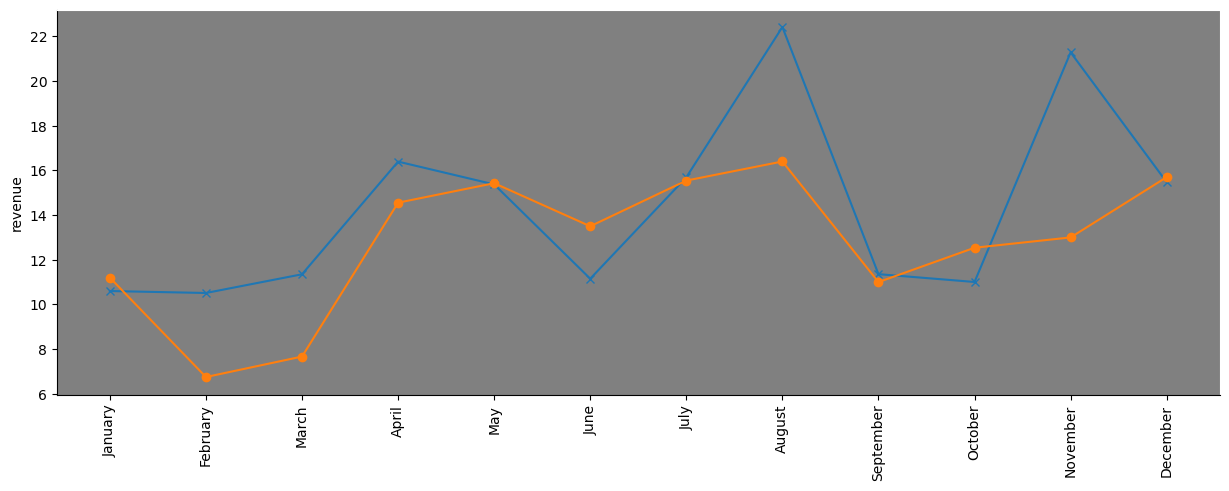

In [84]:
ax = plt.axes() ##creas una plantilla para modificar los ejes
ax.set_facecolor('gray')
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('white')

plt.plot(df_line['fecha'], 
    df_line['revenue'],
    linewidth=1.5,
    marker = "x" ##*para estrellita, o para circulos, + para mases
    )

plt.plot(df_line['fecha'], 
    df_line['quantity'],
    linewidth=1.5,
    marker = "o" ##*para estrellita, o para circulos, + para mases
    )

plt.xticks(df_line['fecha'], meses, rotation = 90) ##lista de los valores nuevos, sobre que columna quiero pintar

plt.ylabel('revenue')

;

In [97]:
df_country = df.groupby(by=[df['fecha'].dt.month,df['country']])['revenue'].mean().reset_index()
df_country

,fecha,country,revenue
0,1,United Kingdom,10.600000
1,2,United Kingdom,10.512500
2,3,United Kingdom,11.350000
3,4,United Kingdom,16.394444
4,5,France,20.800000
5,5,Spain,15.000000
6,5,United Kingdom,14.364000
7,6,United Kingdom,11.151667
8,7,Belgium,10.000000
9,7,Germany,13.200000


<AxesSubplot:xlabel='fecha', ylabel='revenue'>

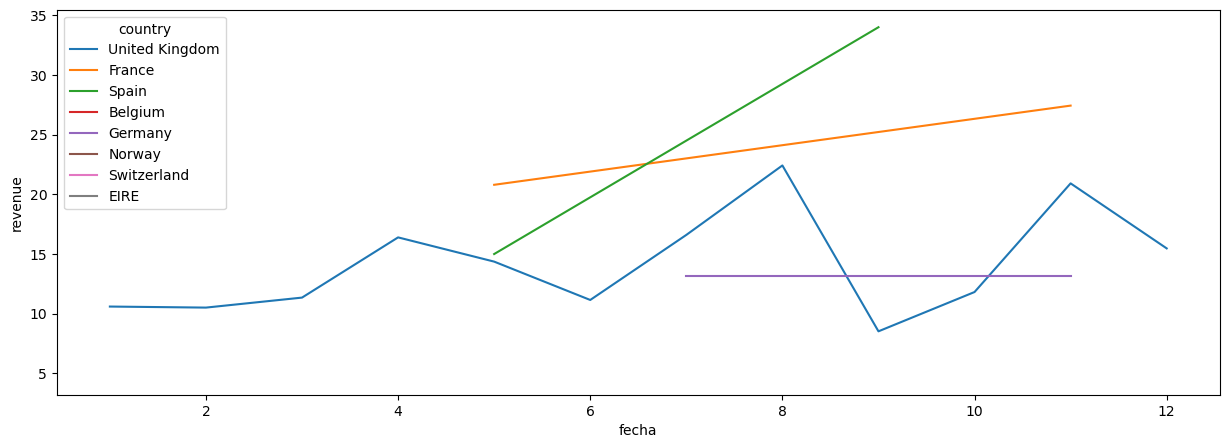

In [99]:
##si quieres hacer una gráfica con múltiples líneas (como la que itentábamos hacer con los países), no la puedes hacer con matplotlib --> pasa a seaborn
sns.lineplot(x =df_country['fecha'], ##EJE X
    y=df_country['revenue'], ##EJE Y
    hue = df_country['country']
    )

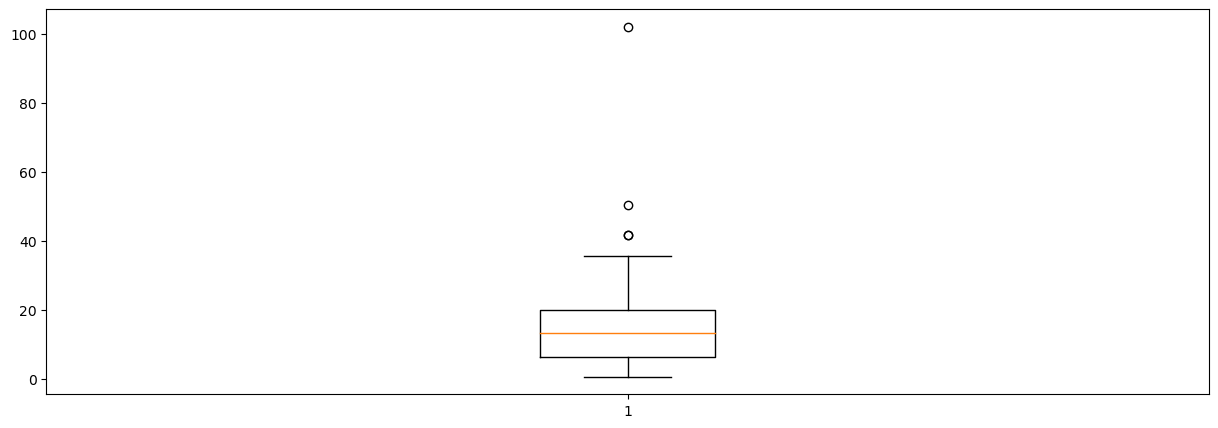

In [101]:
## boxplot
plt.boxplot(df['revenue']);

In [ ]:
for i in columns:
    plt.boxplot(df[columns])
    plt.show();

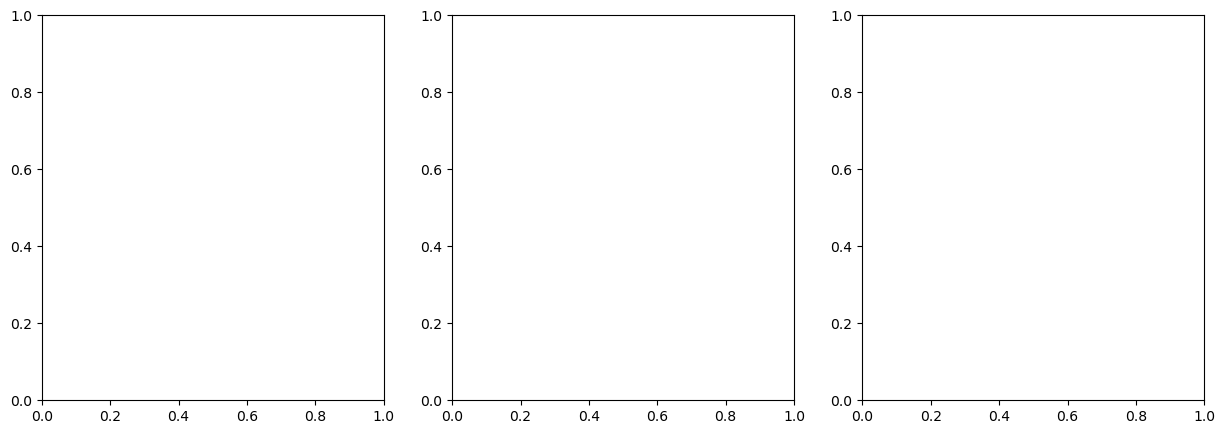

In [102]:
fig,ax = plt.subplots(nrows=1, ncols = 3) ## creamos un vessel para cada una de las gráficas que queremos plottear

In [106]:
ax[0] # los axes son accesibles con los índices

<AxesSubplot:>

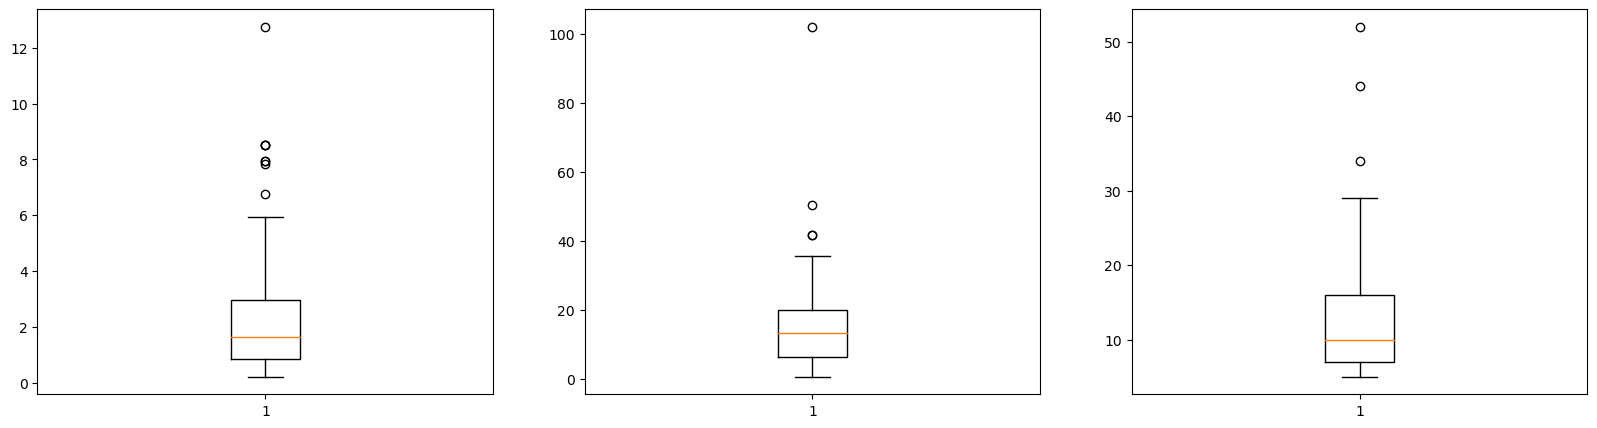

In [113]:
fig,ax = plt.subplots(nrows=1, ncols = 3, figsize=(20,5)) ## creamos un vessel para cada una de las gráficas que queremos plottear
ax[0].boxplot(df['unitprice']) # en cada uno de los arrays, se coloca una de las gráficas
ax[1].boxplot(df['revenue'])
ax[2].boxplot(df['quantity']);

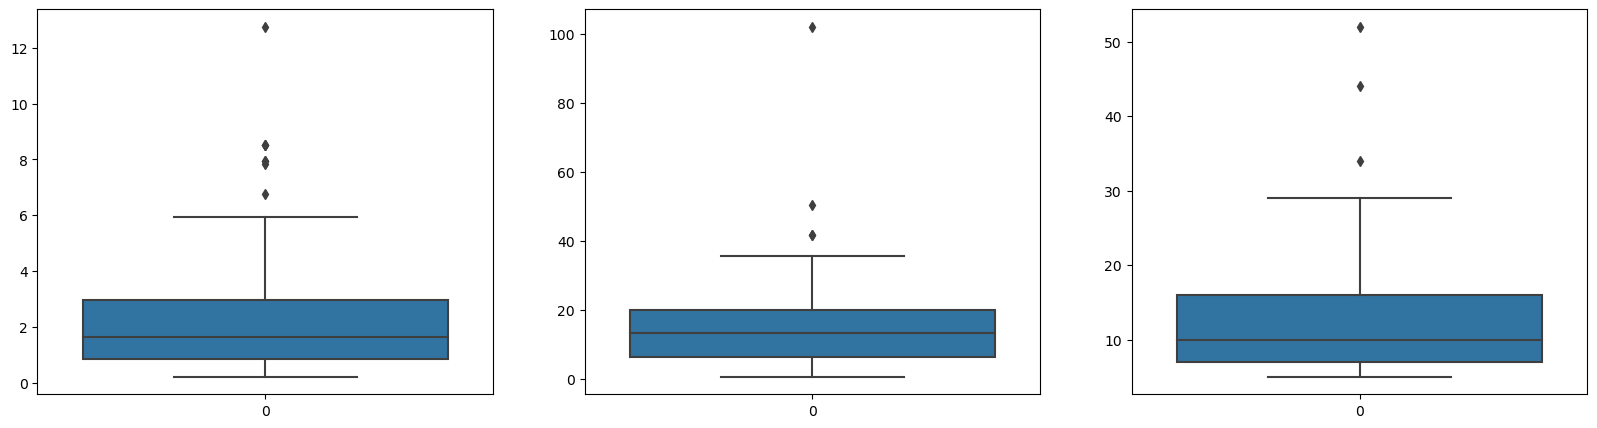

In [120]:
## boxplot en seaborn

fig,ax = plt.subplots(nrows=1, ncols = 3, figsize=(20,5)) ## creamos un vessel para cada una de las gráficas que queremos plottear

sns.boxplot(df['unitprice'], ax=ax[0])
sns.boxplot(df['revenue'], ax=ax[1])
sns.boxplot(df['quantity'], ax=ax[2]);

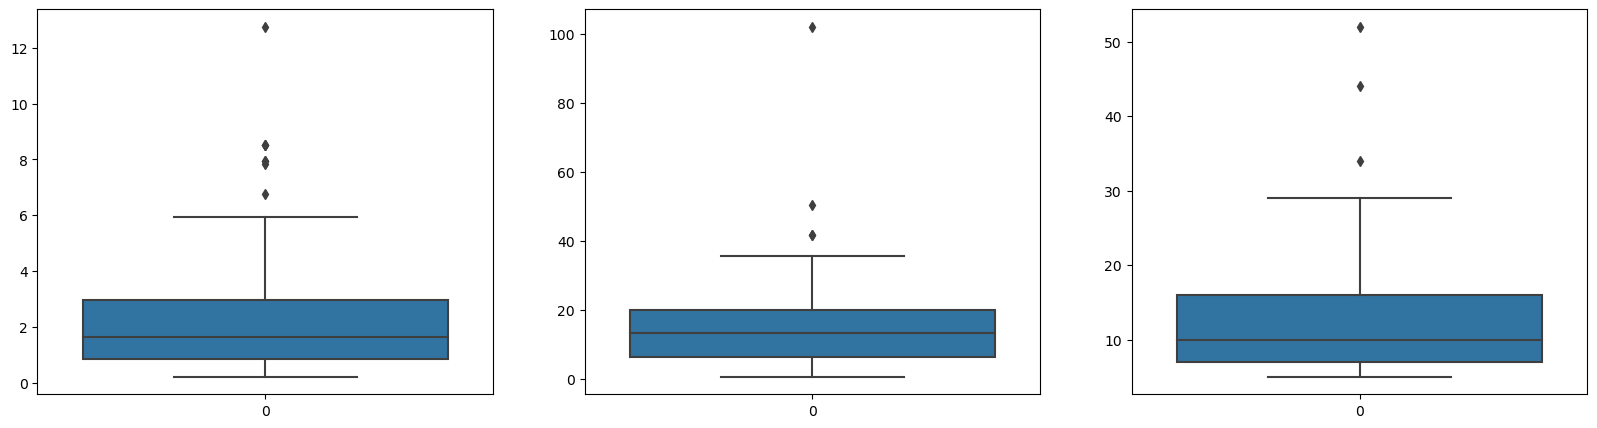

In [123]:
columnas = ['unitprice', 'revenue', 'quantity']
fig,ax = plt.subplots(nrows=1, ncols = 3, figsize=(20,5))

for indice, columna in enumerate(columnas):
    sns.boxplot(df[columna], ax = ax[indice])

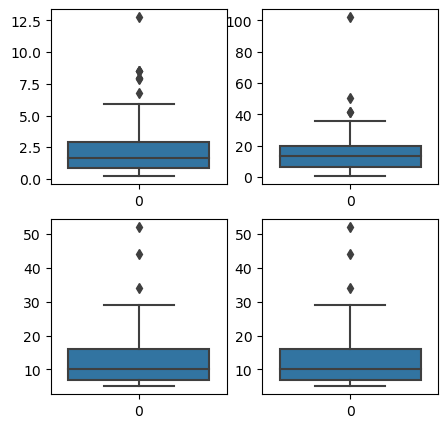

In [126]:
##y si tengo los charts como un array??
columnas = ['unitprice', 'revenue', 'quantity']
fig,ax = plt.subplots(nrows=2, ncols = 2, figsize=(5,5))

sns.boxplot(df['unitprice'], ax=ax[0][0])
sns.boxplot(df['revenue'], ax=ax[0][1])
sns.boxplot(df['quantity'], ax=ax[1][0])
sns.boxplot(df['quantity'], ax=ax[1][1]);

In [127]:
## vemos lo que es un heatmap
## si el valor tiene a 0, no hay correlación
## si es -1 las variable son dependientes, pero inversamente
## si es 1 las variables son dependientes directas: crecen juntas/decrecen juntas
## +- 0.7 existe correlación
df.corr()

C:\Users\annas\AppData\Local\Temp\ipykernel_20272\2292396317.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,customerid,invoiceno,quantity,unitprice,revenue,nullid,desciption_cambiada,precio_total
customerid,1.000000,0.008982,-0.053896,-0.120508,-0.166138,0.058701,NaN,-0.178640
invoiceno,0.008982,1.000000,0.065059,-0.018356,0.227026,0.091666,NaN,0.152613
quantity,-0.053896,0.065059,1.000000,-0.411084,0.429766,0.009546,NaN,0.100771
unitprice,-0.120508,-0.018356,-0.411084,1.000000,0.339981,-0.187670,NaN,0.742185
revenue,-0.166138,0.227026,0.429766,0.339981,1.000000,-0.105169,NaN,0.882602
nullid,0.058701,0.091666,0.009546,-0.187670,-0.105169,1.000000,NaN,-0.168764
desciption_cambiada,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
precio_total,-0.178640,0.152613,0.100771,0.742185,0.882602,-0.168764,NaN,1.000000


C:\Users\annas\AppData\Local\Temp\ipykernel_20272\2021168337.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot:>

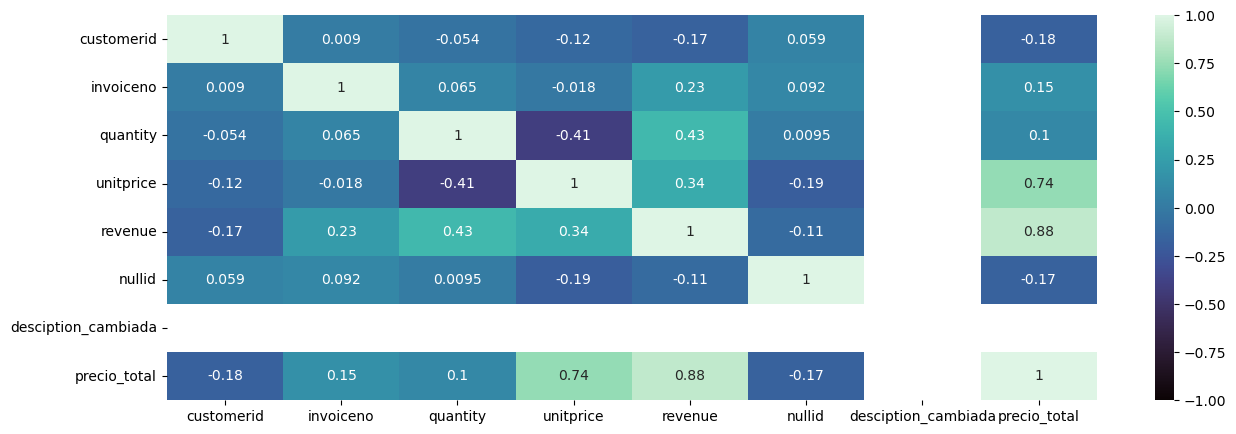

In [132]:
sns.heatmap(df.corr(), 
    annot = True, ##se muestrn los valores de la correlación
    vmin=-1, ##cambia los valores de los colores de la escala
    vmax=1,
    cmap = "mako" ##color
    )

C:\Users\annas\AppData\Local\Temp\ipykernel_20272\1230123284.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\annas\AppData\Local\Temp\ipykernel_20272\1230123284.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\annas\AppData\Local\Temp\ipykernel_20272\1230123284.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this 

<AxesSubplot:>

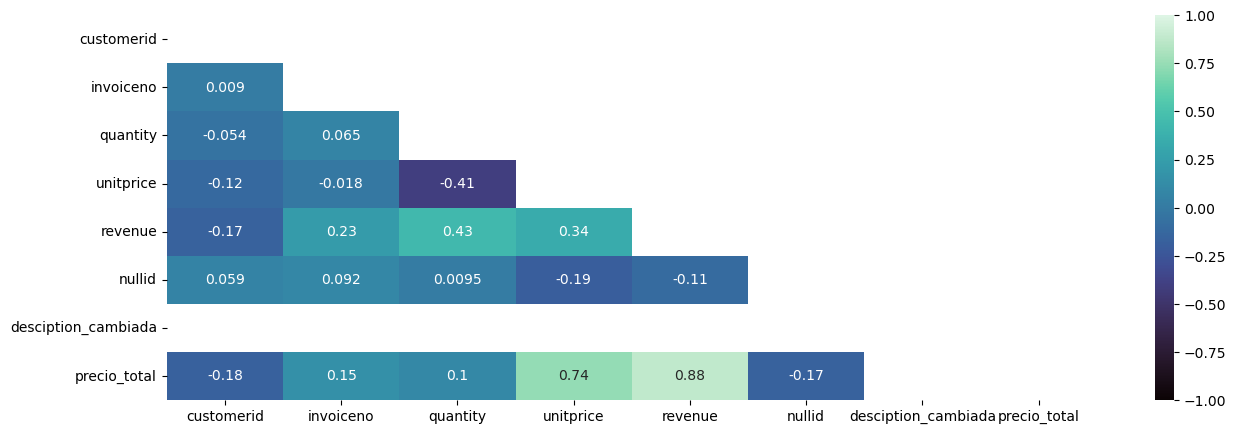

In [135]:
##quitar duplicados
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

sns.heatmap(df.corr(), 
    annot = True, ##se muestrn los valores de la correlación
    vmin=-1, ##cambia los valores de los colores de la escala
    vmax=1,
    cmap = "mako", ##color
    mask=mask
    )

C:\Users\annas\AppData\Local\Temp\ipykernel_20272\3171427268.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

C:\Users\annas\AppData\Local\Temp\ipykernel_20272\3171427268.py:2: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

C:\Users\annas\AppData\Local\Temp\ipykernel_20272\3171427268.py:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this 

<AxesSubplot:>

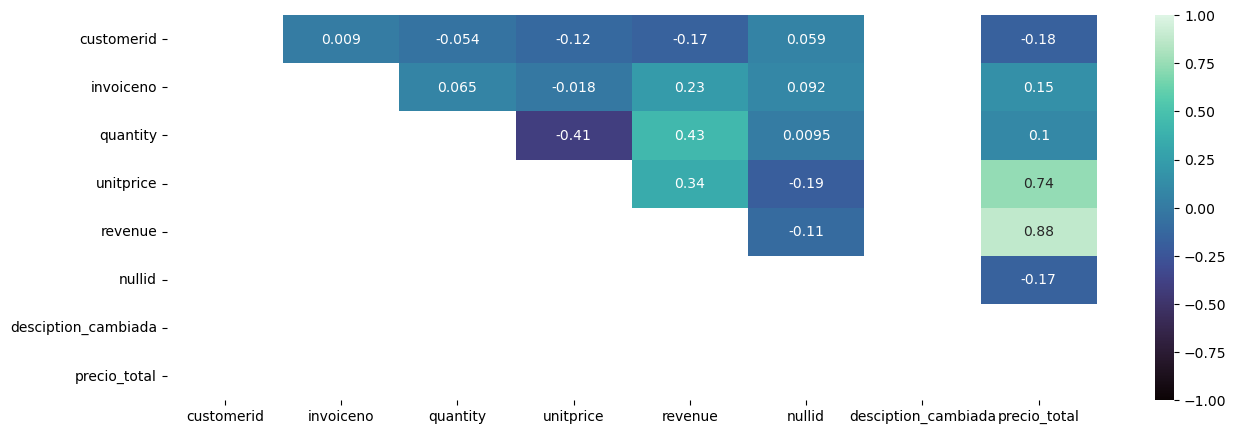

In [136]:
##quitar duplicados
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool)).T

sns.heatmap(df.corr(), 
    annot = True, ##se muestrn los valores de la correlación
    vmin=-1, ##cambia los valores de los colores de la escala
    vmax=1,
    cmap = "mako", ##color
    mask=mask
    )

original

In [ ]:
plt.figure(figsize = (8,5)) # para establecer el tamaño de la figura. Este tamaño solo se aplicará a esta figura 

plt.hist(df["revenue"], edgecolor = "black", # poner el color de la línea
                        facecolor = "mediumseagreen", # poner el color de relleno
                        bins = 20)
plt.show();

In [ ]:
# si queremos establecer el tamaño de la figura una vez y que sea igual para todas las figuras

plt.rcParams["figure.figsize"] = (10,8)

In [ ]:
# pero nuestra gráfica no tiene nombres en los ejes 😔. 

plt.hist(df["revenue"], edgecolor = "black",
                        facecolor = "mediumseagreen",
                        bins = 20)

plt.xlabel("unit price") # para poner etiqueta en el eje x
plt.ylabel("conteo") # para poner etiqueta en el eje y

plt.show();

2️⃣ **`SEABORN`** --> método `sns.displot`

In [ ]:
sns.displot(df.revenue,
            facecolor='dodgerblue', # poner el color de relleno
            edgecolor = "black", # poner el color de la línea 
            bins=20, 
            color= "black" ,# para cambiar el color de la línea del kde
            kde=True); # para trazar una línea de densidad

Buenas y malas noticias! 

😃 Seaborn nos genera el nombre de los ejes automanticamente

😞 Los parámetros generales para el tamaño que establecimos no se aplican a las figuras de seaborn. 

Veamos como se cambia el tamaño! 

En el caso del `displot` como `lmplot`, `catplot`, `factorplot`, `jointplot` tienen unos parámetros específicos para cambiar el tamaño de la figura. Estos son: 

- `height`: altura (en pulgadas) de cada plot.


- `aspect`: relación de aspecto de cada plot, de modo que aspecto * altura da el ancho de cada plot en pulgadas.


In [ ]:
# cambiamos el tamaño de la imagen
sns.displot(df.revenue,
            facecolor ='dodgerblue', # poner el color de relleno
            edgecolor = "black", # poner el color de la línea 
            bins=20, 
            kde=True, 
            color = "black",
            height = 10, # establecer la altura de la gráfica
            aspect =0.9); # establecer la relación del aspecto

Otras formas de cambiar el tamaño de una figura en seaborn [aquí](https://www.delftstack.com/howto/seaborn/size-of-seaborn-plot/)

3️⃣ **`PLOTLY`** --> método `sns.displot`

In [ ]:
fig1 = px.histogram(df, x="revenue", 
                    nbins = 20, 
                    width=900, # establecer la anchura
                    height=600) # establecer la altura

fig1.update_layout(title='Revenue') # poner título al gráfico

fig1.update_traces(marker=dict(color='grey')) # establecer el color de las barras

fig1.show()

In [ ]:
# en plotly si que podemos pasarle dos parámtros, al histograma. Pero en este caso será un countplot
fig2 = px.histogram(df, x = "fecha", 
                        y = "revenue", 
                           nbins = 20)

fig2.show()

## Pie Chart 

Es un gráfico circular que se divide en rebanadas para ilustrar la proporción numérica. Cada porción de un gráfico circular sirve para mostrar la proporción de las partes de un todo.


**Cuándo utilizarlo**: El gráfico circular se suele usar en pocas ocasiones, ya que puede resultar difícil comparar las secciones del gráfico. En su lugar, se utiliza el diagrama de barras, ya que es fácil comparar las secciones.

In [ ]:
df.head(2)

En este caso vamos a querer plotear la media de dinero gastado por paises. 

1️⃣ **`MATPLOTLIB`** --> método `plt.pie`

In [ ]:
# veamos que pasa si hacemos un plot de este tipo básico

plt.pie(df['precio_total'], 
       labels = df["country"]);

Oh oh... tenemos un problema, aquí no hay quien entienda nada. ¿Se os ocurre algo? 

In [ ]:
# la solución es hacer un groupby por pais. 

df_pie = pd.DataFrame(df.groupby(['country'])
                      ["precio_total"].mean()).reset_index()

df_pie.head()

In [ ]:
colors = ['mediumslateblue', 'purple', 'rebeccapurple', 'blueviolet'
          ,'indigo', 'violet', 'plum', 'mediumorchid'] # para establecer los colores

explode = (0, 0.1 ,0.1, 0, 0, 0.1, 0, 0.1) # para sacar los quesitos hacia fuera

plt.pie(df_pie['precio_total'], 
       labels = df_pie["country"], 
       colors = colors, # para cambiar el color de la gráfica
       explode = explode)  # para sacar los quesitos hacia fuera

plt.title("Total compras por pais") # para poner el título
plt.legend(bbox_to_anchor=(1.2, 1)) # sacar leyenda y donde colocarla. El primer índice (derecha-izquierda), segundo índice(arriba, abajo) )
plt.show();

⚠️ **En seaborn no tenemos este tipo de gráfico**

2️⃣ **`PLOTLY`** --> método `px.pie`

In [ ]:
# con plotly express

fig5 = px.pie(df_pie, values='precio_total', names='country', 
             title='Total precio por pais', # poner el título de la figura
             color_discrete_sequence = px.colors.sequential.haline # para elegir la escala de colores
             )
fig5.show()

## Lineplot

Es útil para entender la tendencia en el tiempo. También nos puede auydar a entender correlación entre variables. Una tendencia ascendente significa una correlación positiva y una tendencia descendente significa una correlación negativa. Se utiliza sobre todo en modelos de previsión y seguimiento.


**Cuándo utilizarla**: Las series de tiempo deben ser utilizadas cuando una o múltiples variables deben ser trazadas en el tiempo.


Para hacer este tipo de gráficos con la fecha tenemos que hacer unos cambios antes:

In [ ]:
df['fecha'].dt.year.unique()

In [ ]:
# hacemos un groupby por año y mes para calcular la media del precio total

df_line = pd.DataFrame(df.groupby([df['fecha'].dt.year, 
                                   df['fecha'].dt.month])["precio_total"].mean())


In [ ]:
df_line.head(3)

In [ ]:
df_line = df_line.loc[2011].reset_index()

In [ ]:
df_line.head()

1️⃣**`MATPLOTLIB`** --> método `plt.plot`

In [ ]:
ax = plt.axes() # para poder cambiar el estilo de los ejes

ax.set_facecolor("white") # poner el fondo en blanco

ax.spines['bottom'].set_color('black') # color del eje x
ax.spines['top'].set_color('white') # color del eje de arriba
ax.spines['right'].set_color('white') # color del eje de la derecha
ax.spines['left'].set_color('black') # color del eje y

plt.plot(df_line["fecha"], # eje x
         df_line["precio_total"], # eje y
         color = "black", # para cambiar el color de la línea
         linewidth = 2, # para cambiar el grosor de la línea
         marker = "o") # para poner los marcadores en nuestra línea

meses = [datetime.date(2000, m, 1).strftime('%B') for m in range(1, 13)] # lista con los nombres de los meses para ponerlos en el eje x



plt.xlabel("mes") # para poner etiqueta en el eje x
plt.ylabel("precio total") # para poner etiqueta en el eje y
plt.xticks(df_line["fecha"], meses, rotation=45) # modificar los nombres del eje X


plt.show();


2️⃣ **`SEABORN`** --> método `sns.lineplot`

In [ ]:
fig2 = sns.lineplot(data=df_line, x="fecha", y="precio_total",
                    color = "black",
                    marker = "o",
                    markersize = 10, # para cambiar el tamaño del marcador
                   linewidth = 2); # anchura de la línea

fig2.set_xticklabels(meses, # lista con las etiquetas
                     rotation = 45) # inclinación de los ejes
                     

plt.show();

3️⃣ **`PLOTLY`** --> método `px.line`

In [ ]:
fig20 = px.line(df_line, x="fecha", y="precio_total", 
               labels={'fecha': "meses", # para cambiar el nombre de los ejes
                        'precio_total': "precio (€)"}, 
              title='evolucion en el tiempo precio')

fig20.update_traces(mode='markers+lines', # para poner los marcadores
                  line=dict(color="red", # para cambiar el color 
                    width=0.5)) # para cambiar la grosor de la línea

fig20.update_xaxes(showline=True, # mostrar el eje x
                  linewidth=0.5,
                  linecolor='black', 
                  ticks="outside", # configurar las "marcas" de los ejes
                  tickcolor='black', 
                  tickangle = -45)

fig20.update_yaxes(showline=True, # mostrar eje y
                 linewidth=0.5, 
                 linecolor='black', 
                 ticks="outside", # configurar las "marcas" de los ejes
                 tickcolor='black')


fig20.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)' },# quitar el color gris del fondo 
                  xaxis = dict( # para cambiar el nombre de las etiquetas del eje x
                    tickmode = 'array',
                    tickvals = list(range(1,13)), # los valores actuales del eje x
                    ticktext = meses # los valores que quiero poner
    )) 


fig20.show()

## Scatterplot

El gráfico de dispersión ayuda a visualizar dos variables numéricas. Ayuda a identificar la relación de los datos con cada variable, es decir, la correlación o los patrones de tendencia. También ayuda a detectar los valores atípicos en el gráfico.

**Cuándo utilizarlo**: Se utiliza en conceptos de aprendizaje automático como la regresión, donde x e y son variables continuas. También se utiliza en la agrupación de dispersiones o en la detección de valores atípicos.



In [ ]:
df.head(2)

1️⃣ **`MATPLOTLIB`** --> método `plt.scatter`

In [ ]:
plt.scatter(df['unitprice'], df['revenue'])

plt.show();

2️⃣ **`SEABORN`** --> método `sns.scatterplot`

In [ ]:
sns.scatterplot('unitprice', 'revenue', data = df ,
                hue = 'country', # puntos de distintos colores en función de la variable que indiquemos
                s = 100, # tamaño de los marcadores
               palette = "cubehelix") # establecer el color de los puntos

plt.show(); 


3️⃣ **`PLOTLY`** --> método `px.scatter`

In [ ]:
fig10 = px.scatter(df, x= 'unitprice', y= 'revenue', 
                  color = 'country') # es como el hue del scatterplot
fig10.show()

## Heatmap 

Normalmente vamos a usar un `heatmap` para representar visualmente la correlación entre todas nuestras variables

In [ ]:
# seleccionamos todas las filas y todas las columnas menos "descripcion_cambiada"
df = df.loc[:, df.columns != 'desciption_cambiada']

In [ ]:
# la correlacion entre las variables la podemos sacar con el método corr
df.corr()

Con un `heatmap` lo veremos de una forma más amigable

In [ ]:
sns.heatmap(df.corr(),
            cmap = "YlGnBu", # para cambiar el color
           annot = True); # para sacar el valor de la correlación


Para crear solo una parte de la matriz:

In [ ]:
# creamos un dataframe todo de unos de la misma forma que nuestra matriz de correlación
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
mask

In [ ]:
sns.heatmap(df.corr(),
            cmap = "YlGnBu", # para cambiar el color
            mask = mask, 
           annot = True); # para sacar el valor de la correlación

## Barplot 

Se utiliza para dibujar una gráfica de barras. Un diagrama de barras representa una estimación de la tendencia central para una variable numérica con la altura de cada rectángulo y proporciona alguna indicación de la incertidumbre en torno a esa estimación utilizando barras de error.

In [ ]:
df.head(2)

In [ ]:
# creamos el barplot

sns.barplot(x='precio_total', y='country',data=df);


Ahora vamos a querer filtrar por los productos que más se vendem y saber cual es el precio medio gastado por nuestros clientes. 
Para hacer esto primero vamos a hacer un groupby, pero vamos a intriducir un concepto nuevo, el `filter`. 

In [ ]:
# hacemos un groupby con filtro. Agruparemos por descripción y filtraremos por aquellos productos que más se vendan

df_description = df.groupby('description').filter(lambda x: x['description'].count() >= 2 )
df_description.head()

In [ ]:
sns.barplot(x='precio_total', y='description',data=df_description);


## `joinplot` 

Nos permite básicamente emparejar dos gráficos para datos bivariados. Con su elección de que parámetro kind va comparar:

- scatter


- reg


- resid


- kde


- hex

In [ ]:
sns.jointplot(df['unitprice'],df['revenue'],
             kind = 'hex', # establecer el tipo de gráfico principal 
             color = 'seagreen' )
plt.show();

## Boxplot 

Boxplot ofrece un resumen de los datos. Ayuda a entender mejor nuestra distribución.

**Cuándo utilizarlo**: Se debe utilizar cuando requerimos utilizar la información estadística global sobre la distribución de los datos. Se puede utilizar para detectar valores atípicos en los datos.

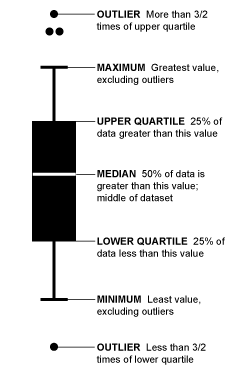

📌 En este caso solo lo vamos hacer solo para algunas columnas, en este caso: 

- unitprice

- precio_total

- quantity

🚨**Atención** vamos a introducir los subplots! 

1️⃣ **`MATPLOTLIB`** --> método `plt.boxplot`

In [ ]:
# primero hacemos una lista con los nombres de las columnas que nos interesan
columnas = ["unitprice", "precio_total", "quantity"]

for col in columnas: 
    plt.boxplot(df[col])
    plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3) # establecemos el número de filas y columnas que queremos, el tamaño no hace falta porque lo seteamos al inicio del jupyter

ax[0].boxplot(df['unitprice']) # figura del primer subplot
ax[1].boxplot(df['precio_total']) # figura del segundo subplot
ax[2].boxplot(df['quantity']) # figura del tercer subplot

plt.show()

In [ ]:
# pero esto también lo podemos hacer con un for loop 

fig, ax = plt.subplots(1, 3)

for i in range(len(columnas)):
    ax[i].boxplot(df[columnas[i]])
plt.show()

2️⃣ **`SEABORN`** --> método `sns.boxplot`

In [ ]:
sns.boxplot(x="unitprice", data=df);

In [ ]:
fig, ax = plt.subplots(3, 1, figsize=(15,10))

for i in range(len(columnas)):
    sns.boxplot(x=columnas[i], data=df, ax=ax[i])
plt.show()

3️⃣ **`PLOTLY`** --> método `px.box`

In [ ]:
fig = px.box(df, y="unitprice")
fig.show()

**DOCUMENTACIÓN INTERESANTE**

- [Colores en Matplotlib](https://matplotlib.org/stable/gallery/color/named_colors.html9)


- [Colores en seaborn](https://seaborn.pydata.org/tutorial/color_palettes.html)


- [Colores en plotly](https://plotly.com/python/builtin-colorscales/) 


- [Tutorial matplotlib](https://matplotlib.org/stable/tutorials/index)


- [Tutorial seaborn](https://seaborn.pydata.org/tutorial.html)


- [Tutorial plotly](https://plotly.com/python/plotly-fundamentals/)